    Velocidade  Temperatura   Status
0            6        -1.45  critico
1            7         8.64   normal
2            3        30.51  critico
3           11         3.88  critico
4           10        27.78   normal
..         ...          ...      ...
95           9        20.15   normal
96           4        26.55   normal
97           7        15.30   normal
98          16         0.27  critico
99           5        15.43   normal

[100 rows x 3 columns]


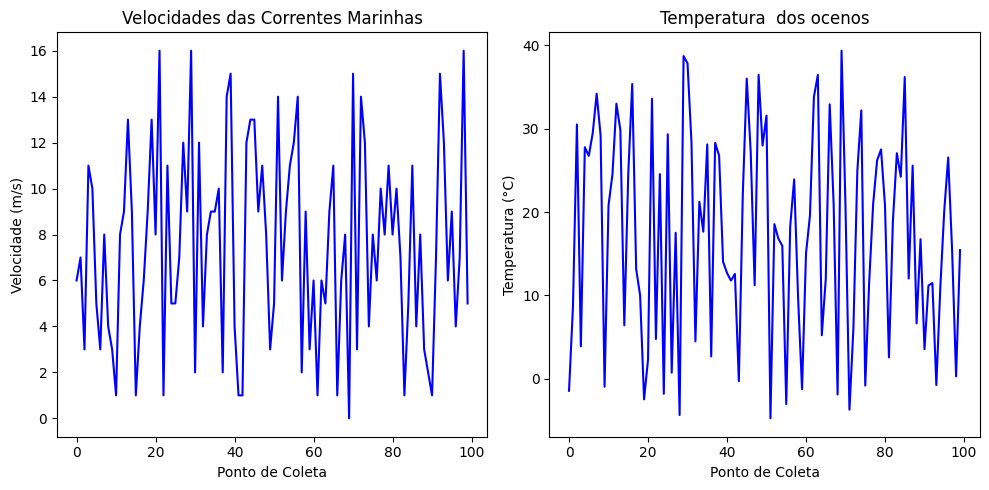

In [1]:
import random # para gerar numeros aleatorios
import json # para salvar os dados em um arquivo JSON
import pandas as pd
import matplotlib.pyplot as plt # grafico

# gerar dados
def coletar_dadosVelocidade(num_pontos):
    veloc = []
    
    for _ in range(num_pontos):
        velocidade = round(random.uniform(0, 16)) 
        veloc.append(velocidade)
    
    return veloc

def coletar_dadosTemperatura(num_pontos):
    Temp = []
    
    for _ in range(num_pontos):
        Temperatura = round(random.uniform(-5, 40.0), 2) 
        Temp.append(Temperatura)
    
    return Temp

# estrutura que descide se esta critico ou nao
def analisar_dados(df):

    def calcular_status(row):
        if 3 < row['Velocidade'] < 14 and 4 < row['Temperatura'] < 31:
            return 'normal'
        else:
            return 'critico'
   
    df['Status'] = df.apply(calcular_status, axis=1)

    
    Status = df['Status']
    return df, Status

# cria um arquivo json
def salvar_dados(nome_arquivo, dados, dadosTemp, StatusJuncao, cores):
    try:
        resultados = {
            "velocidades": dados,
            "Temperatura": dadosTemp,
            "Status": StatusJuncao,
            "Cores": cores  # Adicionado cores
        }
        
        with open(nome_arquivo, 'w') as arquivo:
            json.dump(resultados, arquivo)

    except IOError as e:
        print(f"Erro ao escrever no arquivo: {e}")

# le o arquivo criado anteriormente
def ler_dados(nome_arquivo):

    try:
    
        with open(nome_arquivo, 'r') as arquivo:
            resultados = json.load(arquivo)
    
            # print(json.dumps(resultados, indent=4))
    
            return resultados
        
    except FileNotFoundError:
        print("Arquivo não encontrado.")
    
    except IOError as e:
        print(f"Erro ao ler o arquivo: {e}")
        return None

# cria os graficos
def criar_graficos(dados, cores):
    df= pd.DataFrame(dados)
    plt.figure(figsize=(10, 5))

    velocidade = df['velocidades']
    temperatura = df['Temperatura']

    # Gráfico de Velocidades
    plt.subplot(1, 2, 1)
    # para poder mudar a cor do grafico se for critico ou nao, se usa:
    # plt.scatter(range(len(velocidade)), velocidade, color=cores)
    plt.plot(range(len(velocidade)), velocidade, color='blue')  # Mudado para plt.plot
    plt.title('Velocidades das Correntes Marinhas')
    plt.xlabel('Ponto de Coleta')
    plt.ylabel('Velocidade (m/s)')


    # plt.scatter(range(len(velocidade)), velocidade, color=cores)  # Mudado para plt.scatter
    
    # Gráfico de Temperaturas
    plt.subplot(1, 2, 2)
    plt.plot(range(len(temperatura)), temperatura, color='blue')  # Mudado para plt.plot
    plt.title('Temperatura  dos ocenos')
    plt.xlabel('Ponto de Coleta')
    plt.ylabel('Temperatura (°C)')
    

    plt.tight_layout()
    plt.show()

def main():
    num_pontos = 100 

    dadosVelocidade = coletar_dadosVelocidade(num_pontos)
    dadosTemp = coletar_dadosTemperatura(num_pontos)

    df1 = pd.DataFrame(dadosVelocidade,  columns=['Velocidade'])
    df2 = pd.DataFrame(dadosTemp, columns=["Temperatura"])
    df = pd.concat((df1, df2), axis=1)

    df, Status = analisar_dados(df)

    if df is not None:
        nome_arquivo = "dados_correntes.json"
        
        cores = ['red' if status == 'critico' else 'blue' for status in Status]

        salvar_dados(nome_arquivo, dadosVelocidade, dadosTemp, Status.tolist(), cores)  # Adicionado cores

        resultados = ler_dados(nome_arquivo)

        print(df)
        
        if resultados:
            criar_graficos(pd.DataFrame(resultados), resultados['Cores'])  # Usado cores do arquivo JSON

    else:
        print("Nenhum dado foi coletado.")

if __name__ == "__main__":
    main()
# show do jorge e mateus dia 6
